In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from numpy.random import default_rng
import matplotlib.patches as mpatches
from skimage import feature


# Image Import

In [2]:
fpath = '/Users/josheverts/Documents/CV_Wildfire_Images/Training/No_Fire'
suffix = '/lake_resized_lake_frame'
arr = []
def load_imgs(img_inds, img_arr, dir, suffix):
    for i in img_inds:
        try:
            img_arr.append(plt.imread(dir+suffix+str(i)+'.jpg'))
        except:
            print(i)
            continue
      # print("img load err")
    return np.array(img_arr)

def load_N_imgs(N_imgs):
    fpath_fire = '/Users/josheverts/Documents/CV_Wildfire_Images/Training/Fire'
    suffix_fire = '/resized_frame'
    fpath_nofire = '/Users/josheverts/Documents/CV_Wildfire_Images/Training/No_Fire'
    suffix_nofire = '/lake_resized_lake_frame'
    inds = (np.random.random(N_imgs)*10000).astype('int')
     

In [5]:
fpath_fire_train = '/Users/josheverts/Documents/CV_Wildfire_Images/Training/Fire'
suffix_fire_train = '/resized_frame'
fpath_nofire_train = '/Users/josheverts/Documents/CV_Wildfire_Images/Training/No_Fire'
suffix_nofire_train = '/lake_resized_lake_frame'
fpath_fire_test = '/Users/josheverts/Documents/CV_Wildfire_Images/Test/Fire'
suffix_fire_test = '/resized_test_fire_frame'
fpath_nofire_test = '/Users/josheverts/Documents/CV_Wildfire_Images/Test/No_Fire'
suffix_nofire_test = '/resized_test_nofire_frame'
paths = [fpath_fire_train, fpath_nofire_train, fpath_fire_test, fpath_nofire_test]
all_paths = []
labels = []
for i, path in enumerate(paths):
    files = get_files(path)
    labels.append(np.repeat((i+1)%2, len(files))) ## use mod to set up labels in order of my file paths
    all_paths.append(get_files(path))

### Description of dataset
The main training/testing datset I used consists of fire images from aerial drone footage. The data has been pre-divided into a training set of ~39000 Images and a test set of ~8000 images. The data is slightly imbalanced in both classes, with there being roughly 25000 images of fire and 14000 images without fire in the training set (a roughly 60/40 imbalance) and 5100 fire test images and 3500 no fire test images (also a roughly  60/40 imbalance). 

#### Note: 
The main dataset I use is the FLAME dataset (in my project proposal). I ended up chosing another dataset to perform out-of-sample testing (I did not use this second dataset to train/validate with). The second dataset I ended up using is found here https://www.kaggle.com/datasets/brsdincer/wildfire-detection-image-data

In [7]:
def get_files(fpath):
        return [fpath + "/" + f for f in listdir(fpath) if isfile(join(fpath, f))]
def get_all_imgs(paths):
    imgs = []
    for path in paths:
        for fname in path:
            try:
                imgs.append(plt.imread(fname))
            except:
                print("error")
    return imgs
def get_all_imgs_mod(path): ## modified for read_first_fireset()
    imgs = []
    for fname in path:
        try:
            imgs.append(plt.imread(fname))
        except:
            print("error")
    return imgs

## second image dataset
## read in all files since it is small
def read_second_fireset():
    
    ## define second fire dataset image paths
    fpath_fire_train = '/Users/josheverts/Documents/CV_Wildfire_Images/forest_fire/Training and Validation/fire'
    fpath_nofire_train = '/Users/josheverts/Documents/CV_Wildfire_Images/forest_fire/Training and Validation/nofire'
    fpath_fire_test = '/Users/josheverts/Documents/CV_Wildfire_Images/forest_fire/Testing/fire'
    fpath_nofire_test = '/Users/josheverts/Documents/CV_Wildfire_Images/forest_fire/Testing/nofire'
    paths = [fpath_fire_train, fpath_nofire_train, fpath_fire_test, fpath_nofire_test]
    all_paths = []
    labels = []
    for i, path in enumerate(paths):
        files = get_files(path)
        labels.append(np.repeat((i+1)%2, len(files))) ## use mod to set up labels in order of my file paths
        all_paths.append(get_files(path))
    arr = np.array([])
    for l in labels:  ## concatenate all separate labels together
        arr = np.concatenate((arr, l))
    imgs = get_all_imgs(all_paths)
    return np.array(imgs), arr
    
def load_first_fireset(N_imgs, train_only = True):
    ## for this function, keep X_train, y_train as set up in directory
    fpath_fire_train = '/Users/josheverts/Documents/CV_Wildfire_Images/Training/Fire'
    suffix_fire_train = '/resized_frame'
    fpath_nofire_train = '/Users/josheverts/Documents/CV_Wildfire_Images/Training/No_Fire'
    suffix_nofire_train = '/lake_resized_lake_frame'
    fpath_fire_test = '/Users/josheverts/Documents/CV_Wildfire_Images/Test/Fire'
    suffix_fire_test = '/resized_test_fire_frame'
    fpath_nofire_test = '/Users/josheverts/Documents/CV_Wildfire_Images/Test/No_Fire'
    suffix_nofire_test = '/resized_test_nofire_frame'
    paths = [fpath_fire_train, fpath_nofire_train, fpath_fire_test, fpath_nofire_test]
    all_paths = []
    labels = []
    for i, path in enumerate(paths):
        files = get_files(path)
        labels.append(np.repeat((i+1)%2, len(files))) ## use mod to set up labels in order of my file paths
        all_paths.append(get_files(path))
        
    paths_train = np.array(all_paths[0] + all_paths[1])
    rng = default_rng()
    rand_inds = rng.choice(len(paths_train), N_imgs, replace=False)
    paths_train = paths_train[rand_inds]
    X_train = get_all_imgs_mod(paths_train)
    y_train = np.array([])
    for l in labels[0:2]:  ## concatenate all separate labels together
        y_train = np.concatenate((y_train, l))
    y_train = y_train[rand_inds]
    if not train_only:
        paths_test = [all_paths[2], all_paths[3]]
        X_test = get_all_imgs(paths_test)
        y_test = np.array([])
        for l in labels[2:]:  ## concatenate all separate labels together
            y_test = np.concatenate((y_test, l))
        return X_train, y_train, X_test, y_test
    return X_train, y_train



In [428]:
x_t, y_t, x_test, y_test = load_first_fireset(5000, train_only = False)


# Define and Visualize Features

In [171]:
## Image Histograms as feature
def make_histogram(img):
    bins = np.arange(0, 256, 1)
    r = img[:,:,0].flatten(); g = img[:,:,1].flatten(); b = img[:,:,2].flatten()
    return np.histogram(r, bins = bins)[0], np.histogram(g, bins = bins)[0], np.histogram(b, bins = bins)[0]
def make_normed_histogram(img):
    ## normalize redness histogram by green and blue histograms
    r, g, b = make_histogram(img)
    normed = r/(g+b+.001)
    return normed
def plot_hist(img):
    r,g,b = make_histogram(img)
    fig, ax = plt.subplots(1,1, figsize = (13,8))
    ax.plot(r, c = 'r')
    ax.plot(g, c = 'g')
    ax.plot(b, c = 'b')
    plt.show()
    
## blue/green normalized image
## masked at binary threshold
def fire_thresh(img, w_r = 0.5, w_g=0.5, w_b=0.5, thresh=0.7): ## these weights worked best 
    img_mod = (img[:,:,0]*w_r / (img[:,:,1]*w_g+img[:,:,2]*w_b+.001)) 
    img_thresh = img_mod > thresh
    return img_thresh

## get percent of img which is red from thresholded/masked image
## NOTE: I call this a "percent" but it is really just a normalized value as its not between 0 and 1 always.
def get_img_percent(img, w_r = 0.5, w_g=0.5, w_b=0.5, thresh=0.7):
    img_thresh = fire_thresh(img, w_r, w_g, w_b, thresh)
    percent_fire = np.sum(img_thresh) / 254 ## 254 is an arbitrary normalization factor chosen to be img width
    return percent_fire

## detect edges in blue/green normalized images
def canny_edge(im):
    edges = feature.canny(im)
    return edges
def get_canny_edge(img):
    img_masked = fire_thresh(img)
    edges = canny_edge(img_masked)
    return edges

## average redness intensity in masked region
## visualize percentage 'feature'
def get_masked_img_redness(img, w_r = 0.5, w_g=0.5, w_b=0.5, thresh=0.7):
    img_thresh = fire_thresh(img, w_r, w_g, w_b, thresh)
    masked = img[:,:,0][img_thresh]
    len_masked = len(masked)
    sum_masked = np.sum(masked)
    if len_masked == 0:
        len_masked = 1
    mean_redness = sum_masked/len_masked
#     percent_fire = np.sum(img_thresh) / 254 ## 254 is an arbitrary normalization factor chosen to be img width
    return mean_redness
   

In [9]:
## function to apply any feature
def apply_feature_func(imgs, feature_func, standardize = True):
    features = []
    feature_shape = np.shape(feature_func(imgs[0]))
    dim = 1 ## find flattened dimension
    for val in feature_shape:
        dim*=val
    for i in range(len(imgs)):
        features.append(feature_func(imgs[i]))
#     print(features)
    if len(feature_shape) > 1:
#         print("here")
        features = np.reshape(np.array(features), (len(imgs), dim))
    if standardize:
        features = (features - np.mean(features, axis = 0)) / (np.std(features, axis = 0) + .1)
    return features


# Visualize Features
For feature visualization I have opted for a subset of 5000 training images to keep things faster.

In [587]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [112]:
X_train, y_train, X_test, y_test = load_first_fireset(5000, train_only = False)

### What do the raw images look like? 

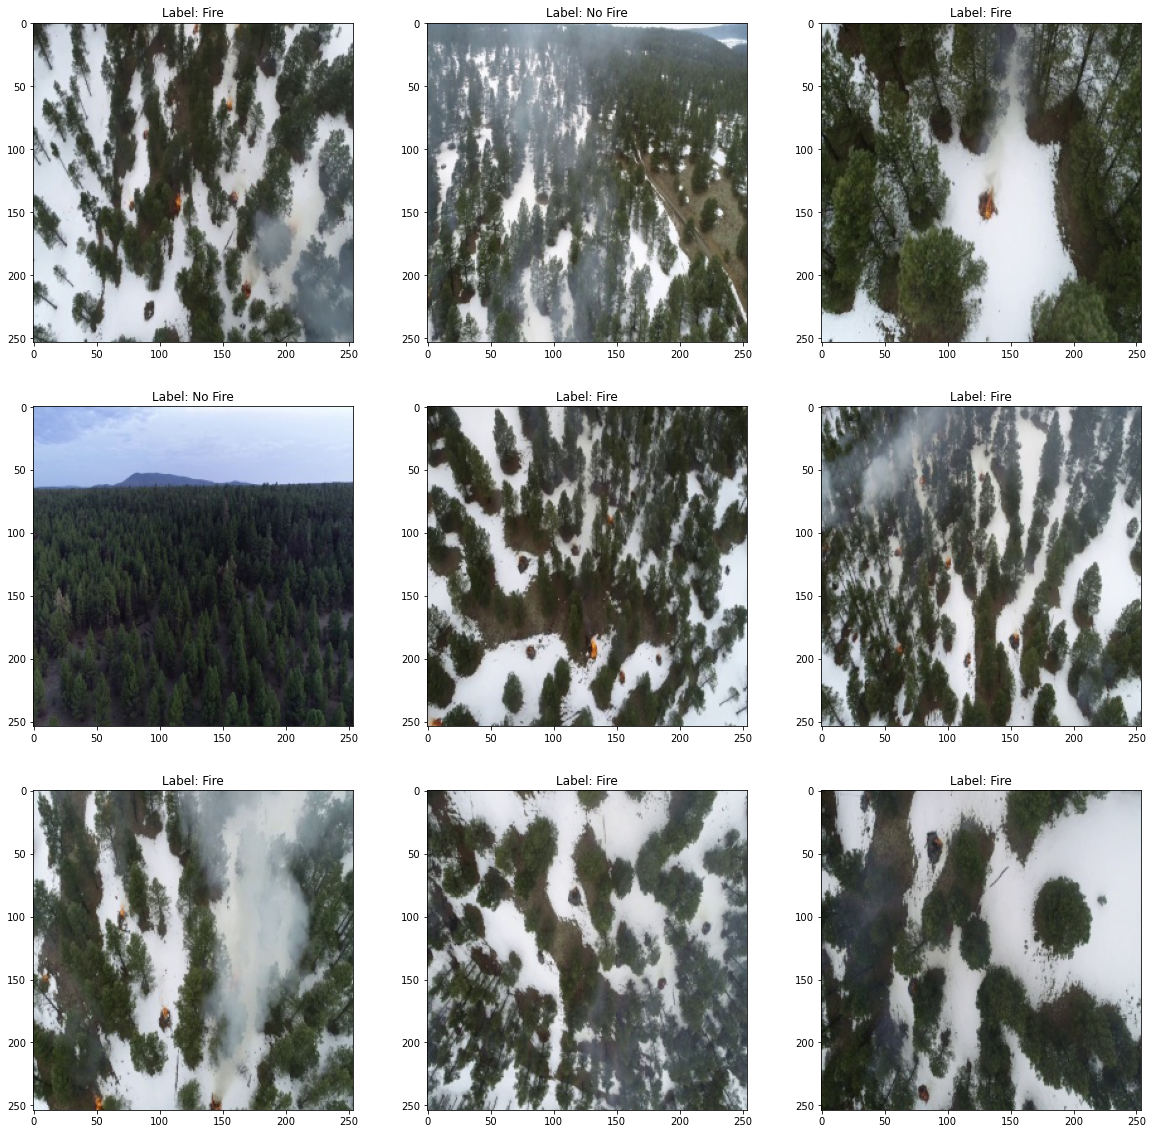

In [113]:
fig, axs = plt.subplots(3, 3, figsize = (20,20))
for i, ax in enumerate(axs.ravel()):
    ax.imshow(X_train[i])
    if y_train[i] == 1:
        label = 'Fire'
    else:
        label = 'No Fire'
    ax.set_title('Label: ' + str(label))

### Visualization of unnormalized histogram embeddings

#### What does an unnormalized RGB histogram look like?

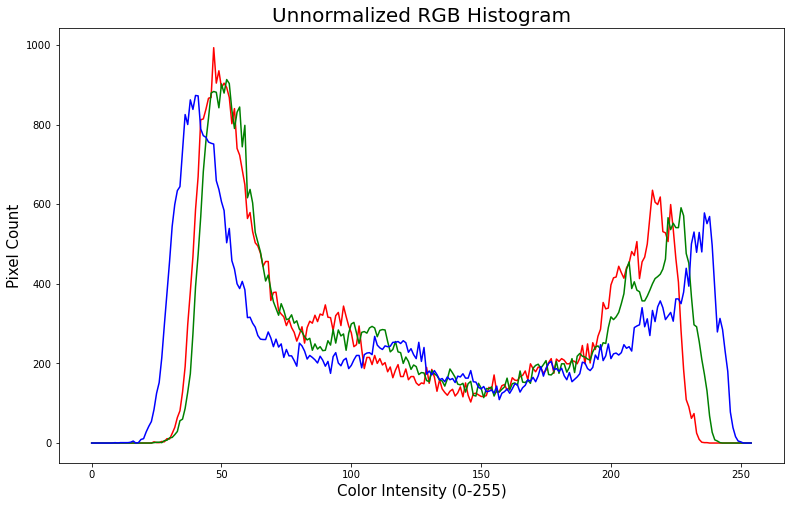

In [122]:
r,g,b = make_histogram(X_train[0])
fig, ax = plt.subplots(1,1, figsize = (13,8))
ax.plot(r, c = 'r')
ax.plot(g, c = 'g')
ax.plot(b, c = 'b')
ax.set_title('Unnormalized RGB Histogram', size = 20)
ax.set_ylabel('Pixel Count', size = 15)
ax.set_xlabel('Color Intensity (0-255)', size = 15)
plt.show()


In [588]:
pca = PCA(n_components = 2)
tsne = TSNE(n_components = 2)
histograms_unnormed_train = apply_feature_func(X_train, make_histogram)

In [596]:
histograms_unnormed_train_pca = pca.fit_transform(histograms_unnormed_train)
histograms_unnormed_train_tsne = tsne.fit_transform(histograms_unnormed_train)

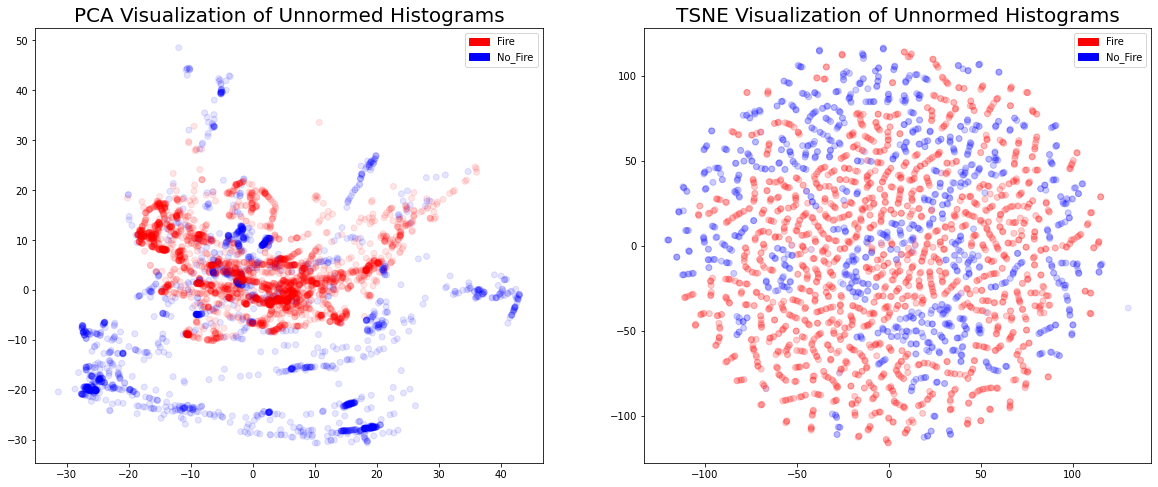

In [599]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
colors = ['blue' if i == 0 else 'red' for i in y_train]
ax1.scatter(histograms_unnormed_train_pca[:,0], histograms_unnormed_train_pca[:,1], c = colors, alpha = 0.1)
ax2.scatter(histograms_unnormed_train_tsne[:,0], histograms_unnormed_train_tsne[:,1], c = colors, alpha = 0.1)
ax1.set_title("PCA Visualization of Unnormed Histograms", size = 20)
ax2.set_title("TSNE Visualization of Unnormed Histograms", size = 20)
fire_patch = mpatches.Patch(color='r', label='Fire')
nofire_patch = mpatches.Patch(color='b', label='No_Fire')
ax1.legend(handles = [fire_patch, nofire_patch])
ax2.legend(handles = [fire_patch, nofire_patch])

### Visualization of normalized histogram embeddings
For the histogram "normalization" I am dividing the redness intensity in the histogram by the blue and green intensities in each bin. $Normalized = r/(b+g)$

#### Normalized Histogram Example

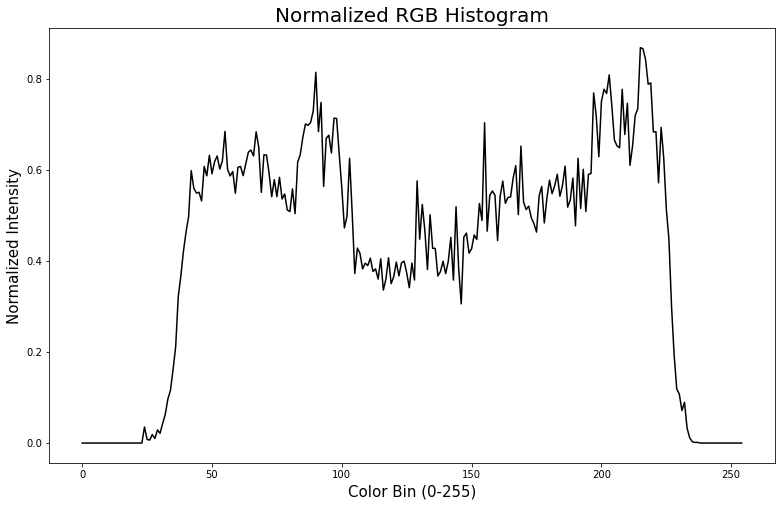

In [121]:
fig, ax = plt.subplots(1,1, figsize = (13,8))
normed_hist = make_normed_histogram(X_train[0])
ax.plot(normed_hist, c = 'k')
ax.set_title('Normalized RGB Histogram', size = 20)
ax.set_ylabel('Normalized Intensity', size = 15)
ax.set_xlabel('Color Bin (0-255)', size = 15)
plt.show()

In [603]:
## Visualization of thresholded and masked images
pca = PCA(n_components = 2)
tsne = TSNE(n_components = 2)
histograms_normed_train = apply_feature_func(X_train, make_normed_histogram)

In [604]:
histograms_normed_train_pca = pca.fit_transform(histograms_normed_train)
histograms_normed_train_tsne = tsne.fit_transform(histograms_normed_train)

(-5.0, 5.0)

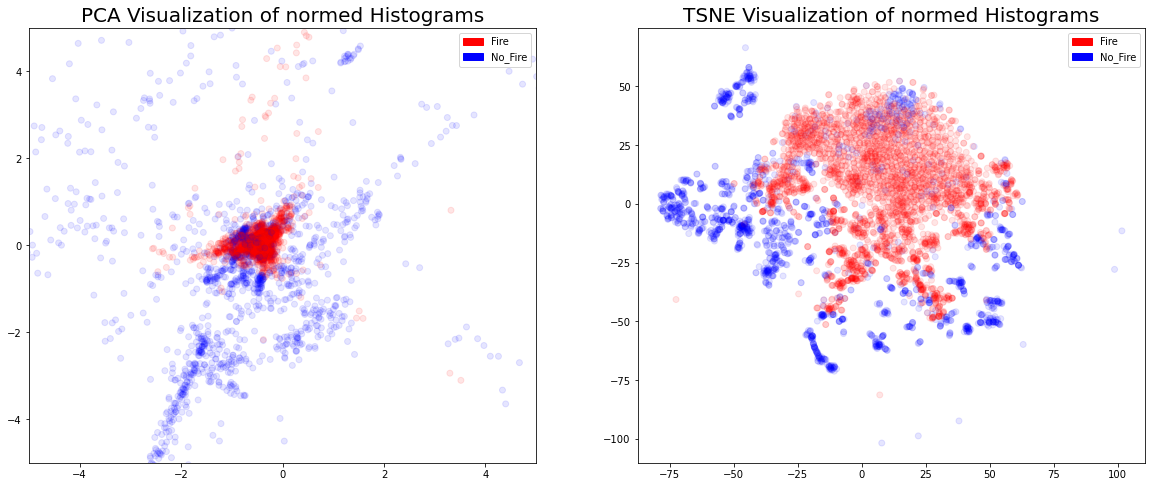

In [634]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
colors = ['blue' if i == 0 else 'red' for i in y_train]
ax1.scatter(histograms_normed_train_pca[:,0], histograms_normed_train_pca[:,1], c = colors, alpha = 0.1)
ax2.scatter(histograms_normed_train_tsne[:,0], histograms_normed_train_tsne[:,1], c = colors, alpha = 0.1)
ax1.set_title("PCA Visualization of normed Histograms", size = 20)
ax2.set_title("TSNE Visualization of normed Histograms", size = 20)
fire_patch = mpatches.Patch(color='r', label='Fire')
nofire_patch = mpatches.Patch(color='b', label='No_Fire')
ax1.legend(handles = [fire_patch, nofire_patch])
ax2.legend(handles = [fire_patch, nofire_patch])
ax1.set_xlim(-5,5)
ax1.set_ylim(-5,5)

### Visualization of Masked image Embeddings
The masked image is a binary threshold of a redness-normalized image where each redness value is divided by the green and blue intensities in that pixel to give a single normalized value.

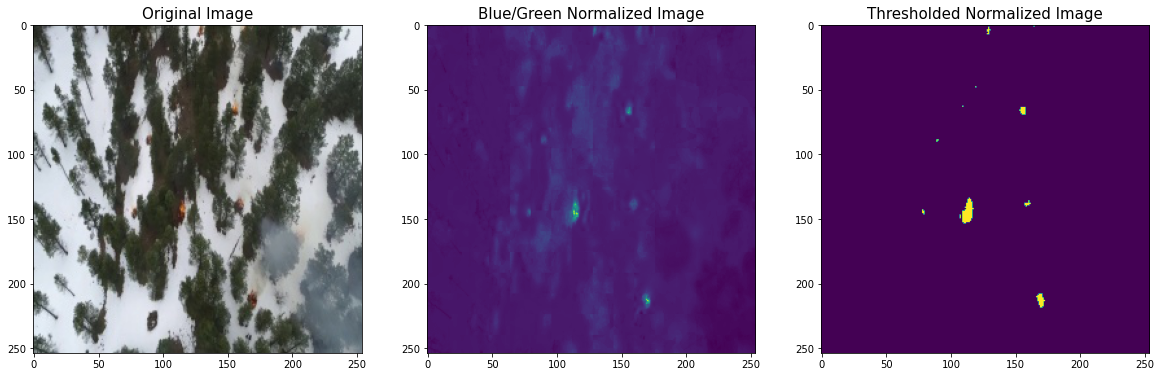

In [125]:
#### Masked Image Visualization
img = X_train[0]
w_r = 0.5; w_g = 0.5; w_b = 0.5; thresh = 0.7
img_mod = (img[:,:,0]*w_r / (img[:,:,1]*w_g+img[:,:,2]*w_b+.001))
img_thresh = img_mod > thresh
img_thresh = img_thresh.reshape(254,254)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,8))
ax1.imshow(img)
ax1.set_title('Original Image', size = 15)
ax2.imshow(img_mod)
ax2.set_title('Blue/Green Normalized Image', size = 15)
ax3.imshow(img_thresh)
ax3.set_title('Thresholded Normalized Image', size = 15)
plt.show()

In [609]:
pca = PCA(n_components = 2)
tsne = TSNE(n_components = 2)
imgs_threshed_train = apply_feature_func(X_train, fire_thresh)

In [627]:
imgs_threshed_train_pca = pca.fit_transform(imgs_threshed_train)
imgs_threshed_train_tsne = tsne.fit_transform(imgs_threshed_train)

(-15.0, 15.0)

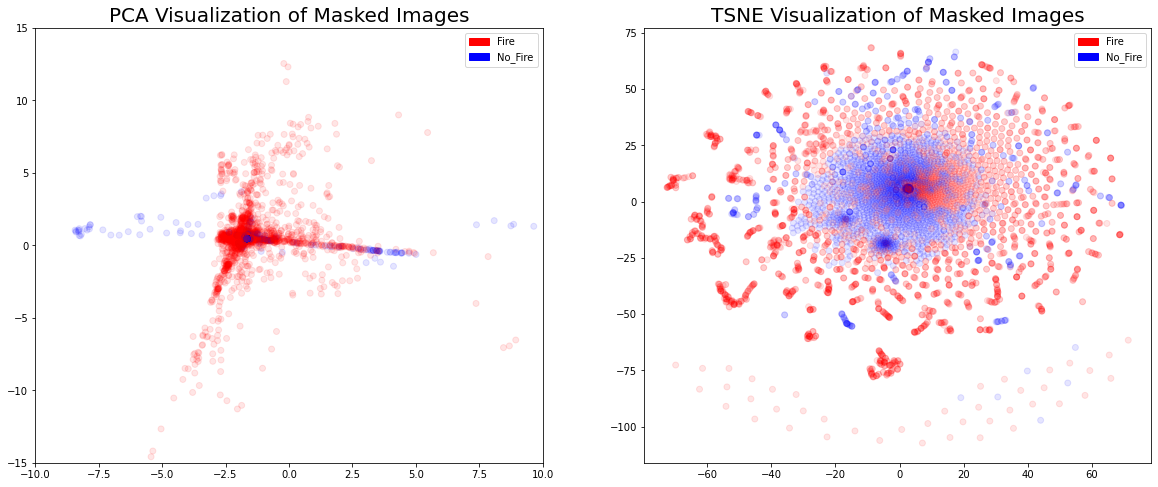

In [635]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
colors = ['blue' if i == 0 else 'red' for i in y_train]
ax1.scatter(imgs_threshed_train_pca[:,0], imgs_threshed_train_pca[:,1], c = colors, alpha = 0.1)
ax2.scatter(imgs_threshed_train_tsne[:,0], imgs_threshed_train_tsne[:,1], c = colors, alpha = 0.1)
ax1.set_title("PCA Visualization of Masked Images", size = 20)
ax2.set_title("TSNE Visualization of Masked Images", size = 20)
fire_patch = mpatches.Patch(color='r', label='Fire')
nofire_patch = mpatches.Patch(color='b', label='No_Fire')
ax1.legend(handles = [fire_patch, nofire_patch])
ax2.legend(handles = [fire_patch, nofire_patch])
ax1.set_xlim(-10,10)
ax1.set_ylim(-15,15)

### Visualization of Masked Image Edges
Using Canny Edge detector

In [129]:
#### Edge Visualization

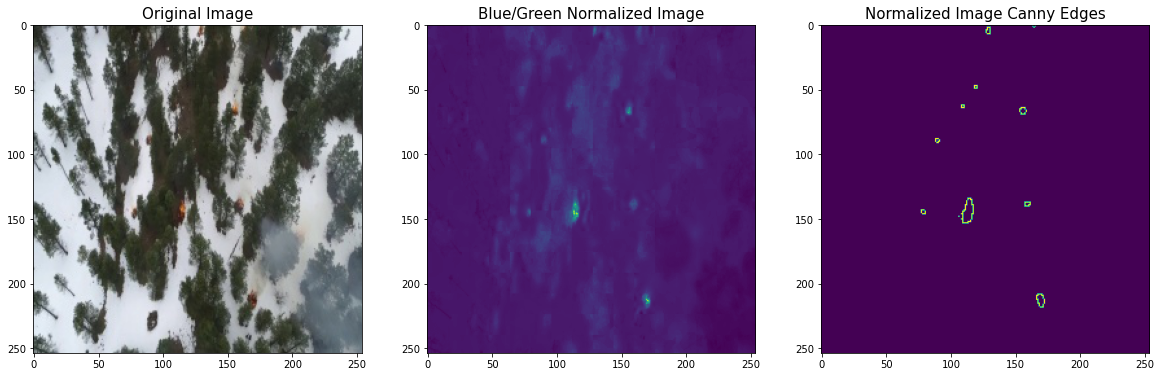

In [128]:
img = X_train[0]
w_r = 0.5; w_g = 0.5; w_b = 0.5; thresh = 0.7
img_mod = (img[:,:,0]*w_r / (img[:,:,1]*w_g+img[:,:,2]*w_b+.001))
img_edges = get_canny_edge(img)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,8))
ax1.imshow(img)
ax1.set_title('Original Image', size = 15)
ax2.imshow(img_mod)
ax2.set_title('Blue/Green Normalized Image', size = 15)
ax3.imshow(img_edges)
ax3.set_title('Normalized Image Canny Edges', size = 15)
plt.show()

In [620]:
pca = PCA(n_components = 2)
tsne = TSNE(n_components = 2)
masked_img_edges_train = apply_feature_func(X_train, get_canny_edge)

In [621]:
masked_edges_train_pca = pca.fit_transform(masked_img_edges_train)
masked_edges_train_tsne = tsne.fit_transform(masked_img_edges_train)

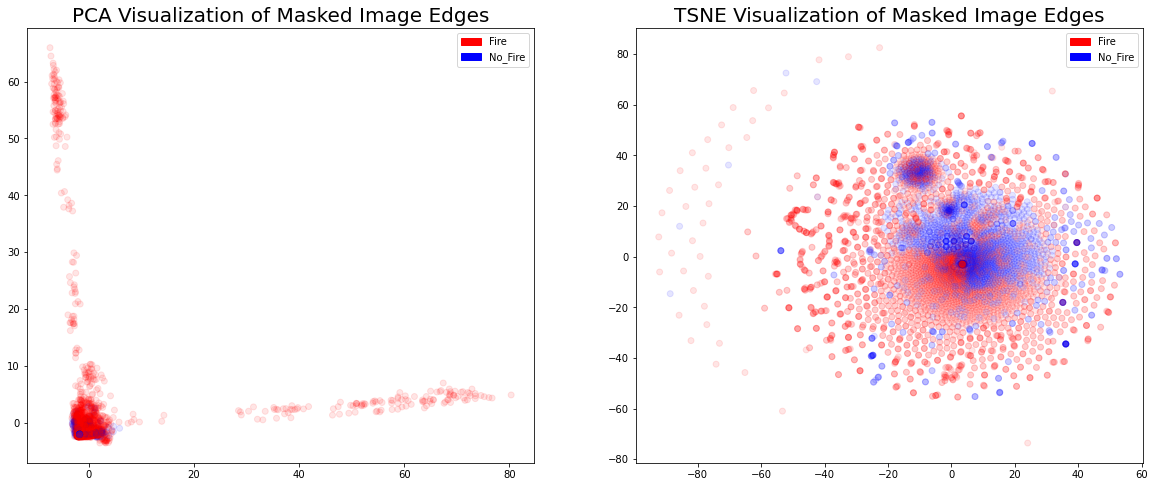

In [624]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
colors = ['blue' if i == 0 else 'red' for i in y_train]
ax1.scatter(masked_edges_train_pca[:,0], masked_edges_train_pca[:,1], c = colors, alpha = 0.1)
ax2.scatter(masked_edges_train_tsne[:,0], masked_edges_train_tsne[:,1], c = colors, alpha = 0.1)
ax1.set_title("PCA Visualization of Masked Image Edges", size = 20)
ax2.set_title("TSNE Visualization of Masked Image Edges", size = 20)
fire_patch = mpatches.Patch(color='r', label='Fire')
nofire_patch = mpatches.Patch(color='b', label='No_Fire')
ax1.legend(handles = [fire_patch, nofire_patch])
ax2.legend(handles = [fire_patch, nofire_patch])

### Visualization of 'Percent Image Redness'

In [131]:
percent_red_train = apply_feature_func(X_train, get_img_percent)

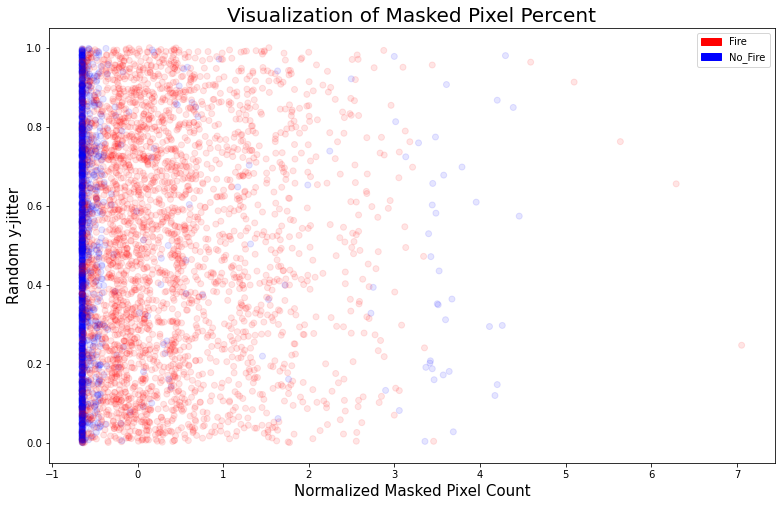

In [615]:
y_jitter = np.random.random(len(x_t))
fig = plt.figure(figsize = (13,8))
plt.scatter(percent_red_train, y_jitter, c = colors, alpha = 0.1)
plt.xlabel('Normalized Masked Pixel Count', size = 15)
plt.ylabel('Random y-jitter', size = 15)
plt.title('Visualization of Masked Pixel Percent', size = 20)
fire_patch = mpatches.Patch(color='r', label='Fire')
nofire_patch = mpatches.Patch(color='b', label='No_Fire')
plt.legend(handles = [fire_patch, nofire_patch])

### Visualization of 'Thresholded/Masked Redness Magnitudes'
Here I plot the redness magnitude vs. percent redness in the image

In [132]:
magnitude_red_train = apply_feature_func(X_train, get_masked_img_redness)

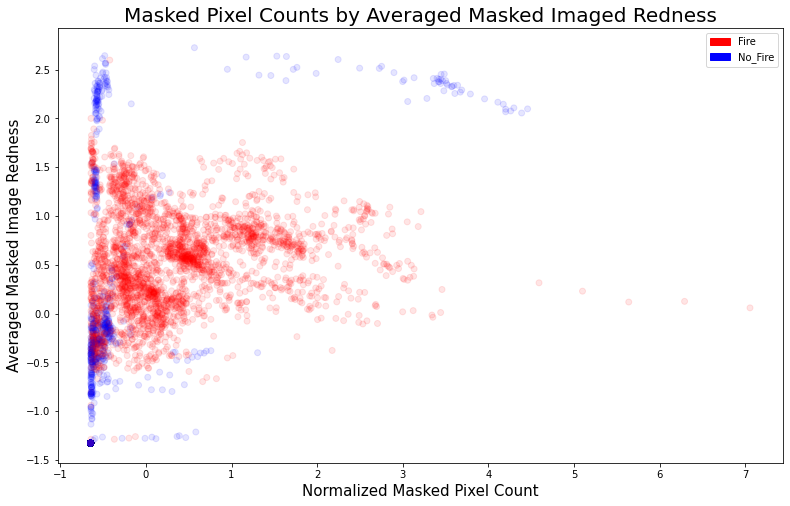

In [617]:
fig = plt.figure(figsize = (13,8))
plt.scatter(percent_red_train, magnitude_red_train, c = colors, alpha = 0.1)
plt.xlabel('Normalized Masked Pixel Count', size = 15)
plt.ylabel('Averaged Masked Image Redness', size = 15)
plt.title('Masked Pixel Counts by Averaged Masked Imaged Redness', size = 20)
fire_patch = mpatches.Patch(color='r', label='Fire')
nofire_patch = mpatches.Patch(color='b', label='No_Fire')
plt.legend(handles = [fire_patch, nofire_patch])

#### Visualizing Distributions of Image Redness/Pixel Ratio in the data

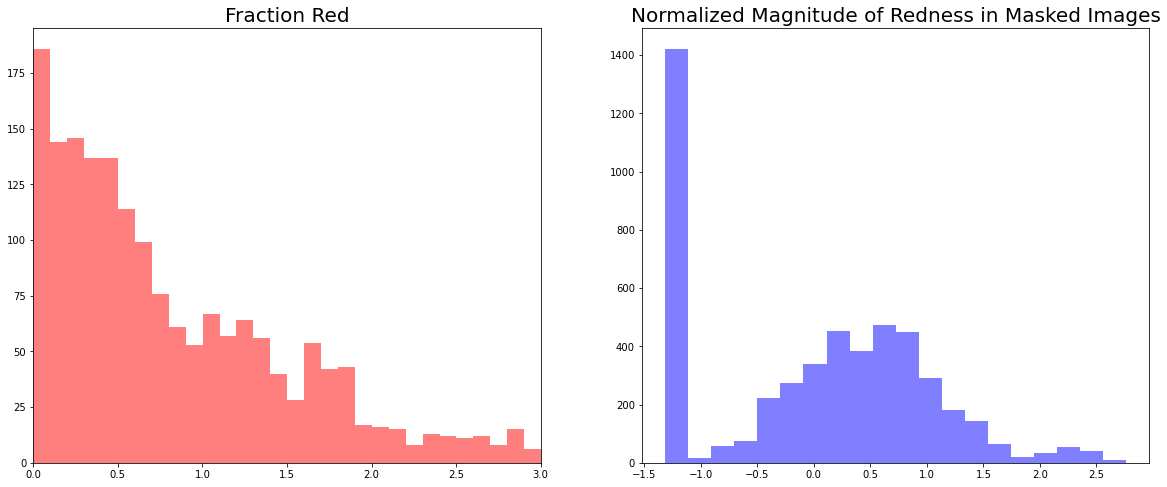

In [151]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
ax1.hist(percent_red_train, color = 'red', alpha = 0.5, label = 'Fraction Red', bins = np.linspace(0,100, 1000))
ax2.hist(magnitude_red_train, color = 'b', alpha = 0.5, label = 'Redness Magnitude', bins = 20)
ax1.set_title('Fraction Red', size = 20)
ax1.set_xlim(0,3)
ax2.set_title('Normalized Magnitude of Redness in Masked Images', size = 20)
plt.show()

# Cross-validate features on training set

In [10]:
## helper functions to combine features and calculate cross-validated accuracy
from sklearn.model_selection import KFold
def combine_features(features):
    ## assumes features are arrays
    features_mod = []
    for feature in features:
        if len(np.shape(feature)) == 1:
            feature = np.array(feature)
            feature = feature[:,np.newaxis]
#             print(np.shape(feature))
        features_mod.append(feature)
#     print(np.shape(features_mod))
    feature_vec = np.hstack(features_mod)
    ## add percent to pca
    return feature_vec

def get_folds(X, y):
    training_X = []
    testing_X = []
    training_y = []
    testing_y = []
    # your code here
    kf = KFold(n_splits=5, random_state=0, shuffle = True)
    for train_idx, test_idx in kf.split(X):
        train_X, test_X = X[train_idx], X[test_idx]
        train_y, test_y = y[train_idx], y[test_idx]
        training_X.append(train_X)
        testing_X.append(test_X)
        training_y.append(train_y)
        testing_y.append(test_y)
    return training_X, testing_X, training_y, testing_y
    
def get_cross_val_acc(X, y, model):
    train_X, test_X, train_y, test_y = get_folds(X, y)
    test_accs = []
    train_accs = []
    for i in range(len(train_X)):
        model.fit(train_X[i], train_y[i])
        train_acc = model.score(train_X[i], train_y[i])
        test_acc = model.score(test_X[i], test_y[i])
        test_accs.append(test_acc)
        train_accs.append(train_acc)
    return np.mean(train_accs), np.mean(test_accs)# Your code here
    

In [11]:
## load in whole training set for cross-validation
N_full = 39000
X_train_full, Y_train_full, x_test, y_test = load_first_fireset(N_full, train_only = False)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [14]:
## get full training features
normed_histogram_train = apply_feature_func(X_train_full, make_normed_histogram)
img_percents_train = np.array(apply_feature_func(X_train_full, get_img_percent, False))
masked_train_redness = np.array(apply_feature_func(X_train_full, get_masked_img_redness, False))

In [33]:
feature_set_train = [img_percents_train, masked_train_redness]
feature_set_train = combine_features(feature_set_train)

In [48]:
## logistic cross-val acc
## no hyperparameters to validate
logreg = LogisticRegression(penalty = 'l2', random_state = 0, solver = 'lbfgs', max_iter = 1000000)
train_val_acc, test_val_acc = get_cross_val_acc(feature_set_train, Y_train_full, logreg)
print(train_val_acc, test_val_acc)

0.8671282051282052 0.8670256410256411


In [56]:
## knn cross-val acc
knn_accuracies = []
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors=i, weights = 'uniform')
    train_val_acc, test_val_acc = get_cross_val_acc(feature_set_train, Y_train_full, neigh)
    knn_accuracies.append([train_val_acc, test_val_acc])
knn_accuracies = np.array(knn_accuracies)

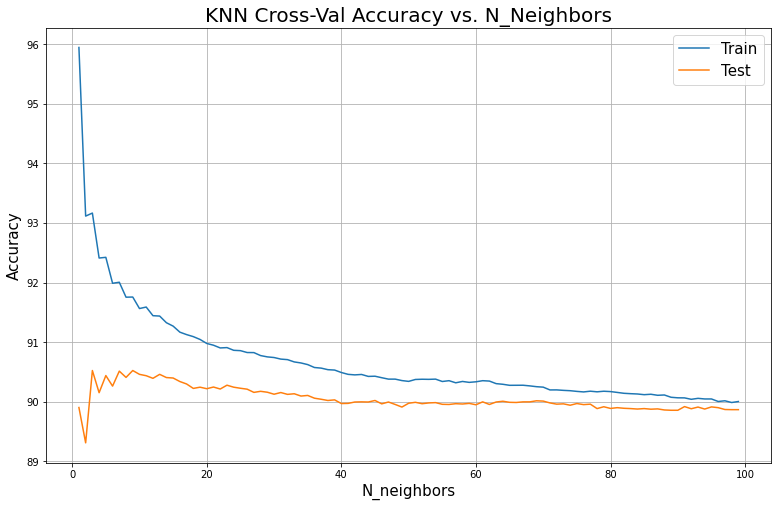

In [59]:
fig = plt.figure(figsize = (13,8))
plt.plot(np.arange(1,100), np.array(knn_accuracies[:,0])*100, label = 'Train')
plt.plot(np.arange(1,100), np.array(knn_accuracies[:,1])*100, label = 'Test')
plt.xlabel('N_neighbors', size = 15)
plt.ylabel('Accuracy', size = 15)
plt.title('KNN Cross-Val Accuracy vs. N_Neighbors', size = 20)
plt.legend(fontsize = 15)
plt.grid()
plt.show()

#### Discussion of KNN Cross-validation:
Although the KNN achieves a very high training accuracy (96%) this is with n_neighbors=1, so it is very overfit. Meanwhile, the best cross-validated test accuracy appears from around n_neighbors = [5,20] before slowly tailing off. In order to avoid overfitting is it better to choose a higher number of nearest neighbors, so based on the cross-validation plot I will use n_neighbors = 20 on the test dataset.

# Score Test Dataset

In [15]:
## get full test features
normed_histogram_test = apply_feature_func(x_test, make_normed_histogram)
img_percents_test = np.array(apply_feature_func(x_test, get_img_percent, False))
masked_test_redness = np.array(apply_feature_func(x_test, get_masked_img_redness, False))
feature_set_test = [normed_histogram_test, img_percents_test, masked_test_redness]
feature_set_test = combine_features(feature_set_test)

In [29]:
feature_set_test = [img_percents_test, masked_test_redness]
feature_set_test = combine_features(feature_set_test)

In [62]:
print("The sizes of the feature arrays are: ")
print("Train features: ",  np.shape(feature_set_test))
print("Test features: ", np.shape(feature_set_train))

The sizes of the feature arrays are: 
Train features:  (8617, 2)
Test features:  (39000, 2)


In [63]:
## logistic
## fit to train and run on whole test
logreg = LogisticRegression(penalty = 'l2', random_state = 0, solver = 'lbfgs', max_iter = 1000000)
sc = StandardScaler()
feature_train_scaled = sc.fit_transform(feature_set_train)
logreg.fit(feature_train_scaled, Y_train_full)
feature_test_scaled = sc.fit_transform(feature_set_test)
predictions_logistic = logreg.predict(feature_test_scaled)
print("Logistic Regression Test Accuracy", logreg.score(feature_test_scaled, y_test))

Logistic Regression Test Accuracy 0.757456191249855


In [65]:
## knn
## from cross-validation we use n_neighbors = 20
neigh = KNeighborsClassifier(n_neighbors=20, weights = 'uniform')
neigh.fit(feature_train_scaled, Y_train_full)
predictions_knn = neigh.predict(feature_test_scaled)
print("KNN Test Accuracy", neigh.score(feature_test_scaled, y_test))

KNN Test Accuracy 0.7334339097133573


In [76]:
## analysis of false positive rate, F1 score, recall, precision, balanced_accuracy
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
def fpr_fnr(true, predicted):
    false_positive = 0
    false_negative = 0
    for i in range(len(true)):
        if true[i] == 0 and predicted[i] == 1:
            false_positive+=1
        elif true[i] == 1 and predicted[i] == 0:
            false_negative+=1
    return false_positive/len(true), false_negative/len(true)

log_f1 = f1_score(y_test, predictions_logistic)
log_precision = precision_score(y_test, predictions_logistic)
log_recall = recall_score(y_test, predictions_logistic)
log_balanced_accuracy = recall_score(y_test, predictions_logistic)
log_fpr, log_fnr = fpr_fnr(y_test, predictions_logistic)

knn_f1 = f1_score(y_test, predictions_knn)
knn_precision = precision_score(y_test, predictions_knn)
knn_recall = recall_score(y_test, predictions_knn)
knn_balanced_accuracy = recall_score(y_test, predictions_knn)
knn_fpr, knn_fnr = fpr_fnr(y_test, predictions_knn)


In [81]:
print("Log F1 %.2f | Log Precision: %.2f\
| Log Recall: %.2f | Log Balanced Acc: %.2f | Log FPR: %.2f | Log FNR: %.2f" 
    %(log_f1, log_precision, log_recall, log_balanced_accuracy, log_fpr, log_fnr))

print("knn F1 %.2f | knn Precision: %.2f\
| knn Recall: %.2f | knn Balanced Acc: %.2f | knn FPR: %.2f | knn FNR: %.2f" 
    %(knn_f1, knn_precision, knn_recall, knn_balanced_accuracy, knn_fpr, knn_fnr))


Log F1 0.82 | Log Precision: 0.73| Log Recall: 0.95 | Log Balanced Acc: 0.95 | Log FPR: 0.21 | Log FNR: 0.03
knn F1 0.80 | knn Precision: 0.72| knn Recall: 0.91 | knn Balanced Acc: 0.91 | knn FPR: 0.22 | knn FNR: 0.05


#### Visualizing classification results

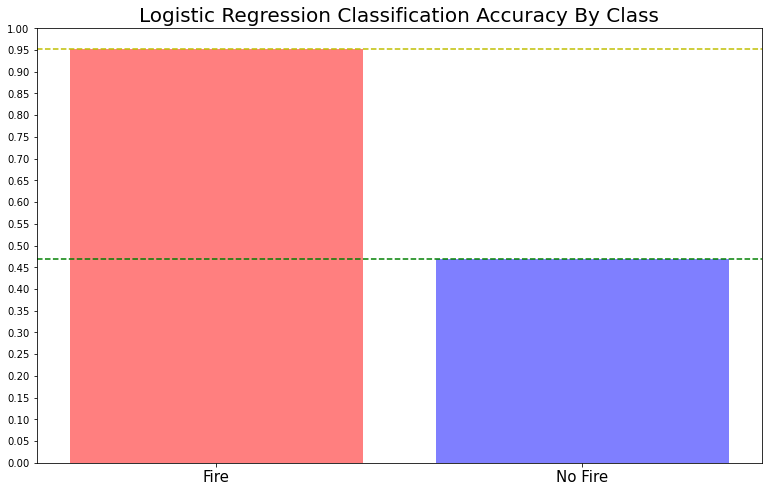

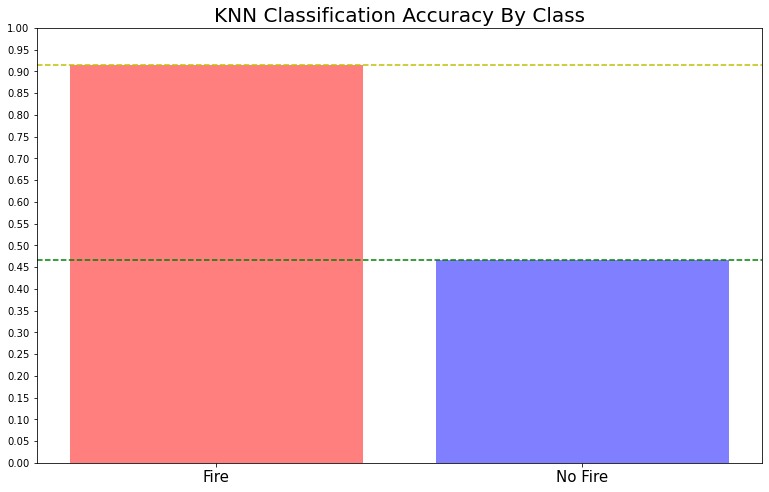

In [103]:
## logistic accuracy by category
def tpr_tnr(true, predicted):
    true_positive = 0
    true_negative = 0
    for i in range(len(true)):
        if true[i] == 1 and predicted[i] == 1:
            true_positive+=1
        elif true[i] == 0 and predicted[i] == 0:
            true_negative+=1
    return true_positive/len(true[true == 1]), true_negative/len(true[true == 0])

log_tpr, log_tnr = tpr_tnr(y_test, predictions_logistic)
knn_tpr, knn_tnr = tpr_tnr(y_test, predictions_knn)
fig = plt.figure(figsize = (13,8))
plt.title('Logistic Regression Classification Accuracy By Class', size = 20)
plt.bar(classes, [log_tpr, log_tnr], color = ['r', 'b'], alpha = 0.5)
plt.xticks(fontsize = 15)
plt.yticks(np.arange(0,1.05,0.05))
plt.axhline(log_tpr, ls = '--', c = 'y')
plt.axhline(log_tnr, ls = '--', c = 'g')

fig = plt.figure(figsize = (13,8))
plt.title('KNN Classification Accuracy By Class', size = 20)
plt.bar(classes, [knn_tpr, knn_tnr], color = ['r', 'b'], alpha = 0.5)
plt.xticks(fontsize = 15)
plt.yticks(np.arange(0,1.05,0.05))
plt.axhline(knn_tpr, ls = '--', c = 'y')
plt.axhline(knn_tnr, ls = '--', c = 'g')
plt.show()


### Class-wise Accuracy
We can see that the logistic classifier has slightly better accuracy in the Fire category (95.5%) vs. the KNN (92%) and in the No Fire Category (47% vs. 46%). In general we can see that both classifiers have much worse accuracy predicting No Fire labels correctly, and tend to do very well classifying fire. Put another way, we have a much higher false positive rate than false negative rate in both classifiers.

# True out-of-sample test
During the testing procedure I held-out a dataset with images of fire and landscape that are completely different than the images I trained, validatd, and performed my original test on. The images are a slightly different size, but the classifier I created ends up being size-invariant since it does not directly pass in images but uses features (two numbers per image in my final classifier). 

This dataset has "more obvious" (to a human anyways) differences between the images compared to my training set, which makes it a better dataset to test on than train on. It also was of limited size (around 2000 images total).

### Example out-of-sample images

In [153]:
imgs_oos, labels_oos = read_second_fireset()

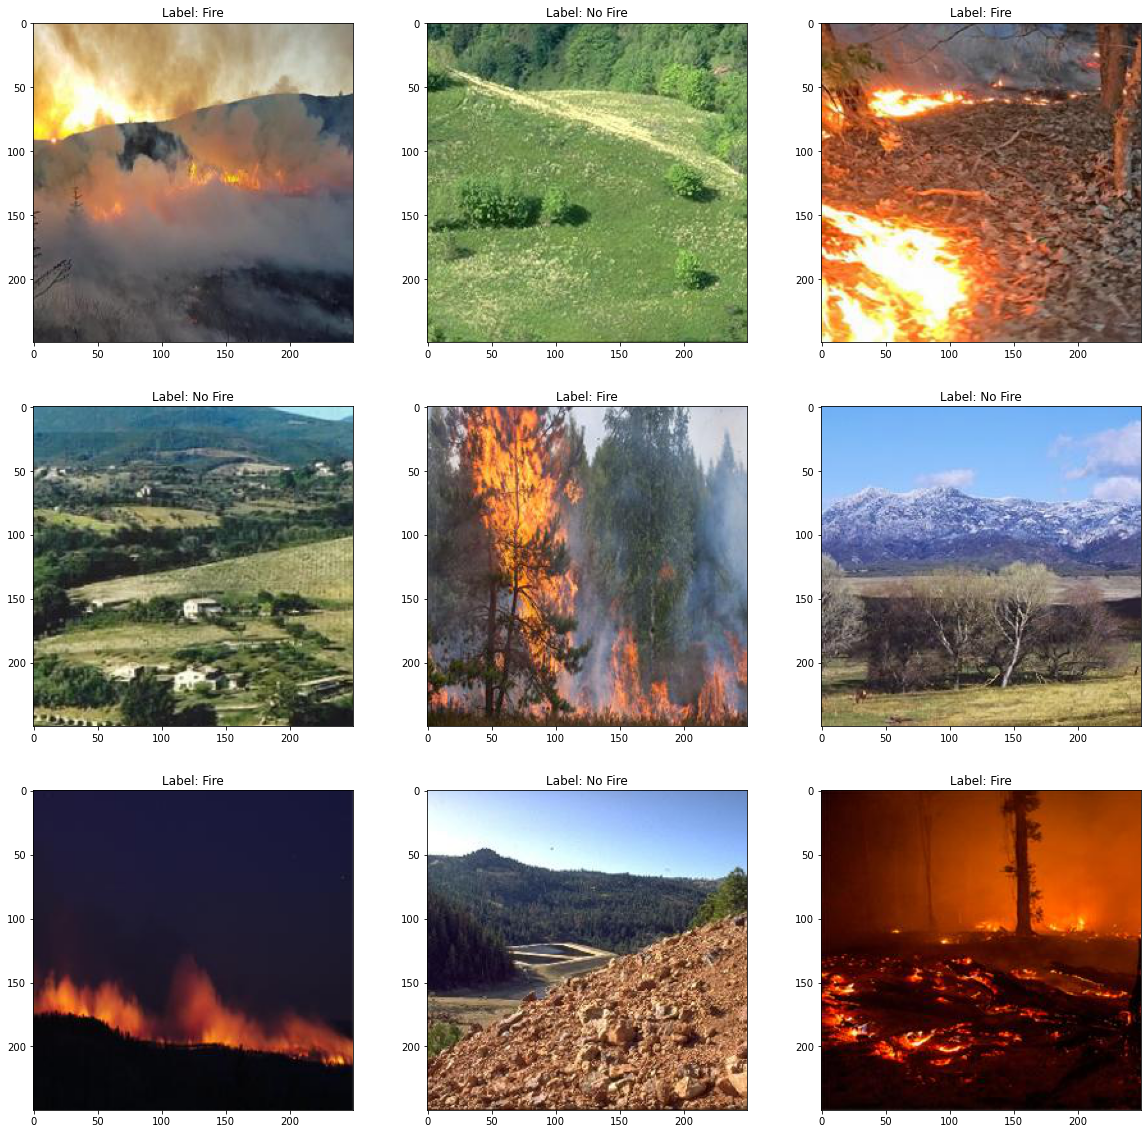

In [170]:
fig, axs = plt.subplots(3, 3, figsize = (20,20))
inds = [1, -1, 2, -2, 3, -3, 4, -4, 5]
for i, ax in enumerate(axs.ravel()):
    ax.imshow(imgs_oos[inds[i]])
    if labels_oos[inds[i]] == 1:
        label = 'Fire'
    else:
        label = 'No Fire'
    ax.set_title('Label: ' + str(label))

In [157]:
# normed_histogram_oos = apply_feature_func(imgs_oos, make_normed_histogram)
img_percents_oos = np.array(apply_feature_func(imgs_oos, get_img_percent, False))
masked_test_oos = np.array(apply_feature_func(imgs_oos, get_masked_img_redness, False))
feature_set_oos = [img_percents_oos, masked_test_oos]
feature_set_oos = combine_features(feature_set_oos)
feature_oos_scaled = sc.fit_transform(feature_set_oos)

In [168]:
## pass feature set through trained models
predictions_logistic_oos = logreg.predict(feature_oos_scaled)
predictions_knn_oos = neigh.predict(feature_oos_scaled)
print("Logistic Out of Sample Acc: %.2f | KNN Out of Sample Acc: %.2f"
      %(logreg.score(feature_oos_scaled, labels_oos), neigh.score(feature_oos_scaled, labels_oos)))

Logistic Out of Sample Acc: 0.86 | KNN Out of Sample Acc: 0.82


In [163]:
## logistic
oos_f1 = f1_score(labels_oos, predictions_logistic_oos)
oos_precision = precision_score(labels_oos, predictions_logistic_oos)
oos_recall = recall_score(labels_oos, predictions_logistic_oos)
oos_balanced_accuracy = recall_score(labels_oos, predictions_logistic_oos)
oos_fpr, oos_fnr = fpr_fnr(labels_oos, predictions_logistic_oos)
print("Log F1 %.2f | Log Precision: %.2f\
| Log Recall: %.2f | Log Balanced Acc: %.2f | Log FPR: %.2f | Log FNR: %.2f" 
    %(oos_f1, oos_precision, oos_recall, oos_balanced_accuracy, oos_fpr, oos_fnr))
## knn
oos_f1 = f1_score(labels_oos, predictions_knn_oos)
oos_recall = recall_score(labels_oos, predictions_knn_oos)
oos_balanced_accuracy = recall_score(labels_oos, predictions_knn_oos)
oos_fpr, oos_fnr = fpr_fnr(labels_oos, predictions_knn_oos)
print("Log F1 %.2f | Log Precision: %.2f\
| Log Recall: %.2f | Log Balanced Acc: %.2f | Log FPR: %.2f | Log FNR: %.2f" 
    %(oos_f1, oos_precision, oos_recall, oos_balanced_accuracy, oos_fpr, oos_fnr))


Log F1 0.88 | Log Precision: 0.79| Log Recall: 0.98 | Log Balanced Acc: 0.98 | Log FPR: 0.13 | Log FNR: 0.01
Log F1 0.84 | Log Precision: 0.79| Log Recall: 0.94 | Log Balanced Acc: 0.94 | Log FPR: 0.14 | Log FNR: 0.03


# Discussion of Results and Generalizability

My key results:
--------------------
Best Test Accuracy: 76%
--------------------
Best Validation Accuracy: 93%
--------------------
Best Out-of-Sample Accuracy (different fire dataset): 86%
--------------------



## Discussion:
The main training data for this dataset, which consists of around 30,000 training images and 8000 test images were taken from frames of aerial drone footage of a simulated wildfire. The creators of the dataset also authored a paper where they performed the same classification task. The paper is here: https://arxiv.org/pdf/2012.14036v1.pdf. 

Shamshoara et. al use a CNN to classify fire/no_fire images. They report a 97% training, 96% validation, and 76% test accuracy using the same dataset I used. 

Considering they achieved a 76% accuracy on their test set with a sophisticated NN, my best accuracy of 75.7% seems fairly competitive, especially because my model trains very fast comparatively. One additional benefit of my model is that it uses fairly interpretable features and algorithms (logistic regression and knn) to perform the classification. Additionally, I have designed it to be fairly invariant to image scale though my normalization constant for the redness images which I have made to be k=254 for now does allow for some scale variance that could be improved upon in a later step.

## Features: 
While I explored many potential features for this model, including image histograms, edges, and whole image embeddings, the best features I found were the fraction of redness in a redness normalized image ($normalized = red/(blue+green)$) for every pixel in the image and the average intensity of the redness in the masked, normalized images. These two features are simple but do a good job at describing the "redness contrast" that we look for when we try to identify fire. Furthermore, it also captures some idea of redness intensity.

## Where might this algorithm fail: 
On images with a very red background, images with a lot of sun or glare, or images where the colors have been filtered or modified I would expect my simple model to break down. However, I believe the model does work decently well on images with small patches of fire, as demonstrated on the original test set. It also seems to generalize acceptably to an out-of-sample fire image dataset.

## Further Improvements: 
I believe my simple model can be expanded with more complex features. While I was not able to get my edge embeddings to work effectively I think edges of a fire outline are relevant. I also believe that the normalized image histograms appear to be a good feature in t-SNE, and they worked well on my training data alone. However they performed very poorly on my cross-validation step so I did not include them here. I believe an improved algorithm should incorporate these more effectively.

In [219]:
## Below are image experiments which I have commented out, feel free to ignore. 

In [172]:
## visualize normalized and unnormalized image histograms with PCA and t-SNE
# histograms_unnormed = []
# for i in range(len(x_t)):
#     histograms_unnormed.append(make_histogram(x_t[i]))
# histograms_unnormed = np.reshape(np.array(histograms_unnormed), (len(x_t), 3*255))


In [173]:
# histograms_unnormed = (histograms_unnormed - np.mean(histograms_unnormed, axis = 0))/ np.std(histograms_unnormed, axis =0)

In [174]:
## PCA visualization of unnormed histograms
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# histograms_unnormed_pca = pca.fit_transform(histograms_unnormed)


In [175]:
# plt.figure(figsize = (13,8))
# colors = ['blue' if i == 0 else 'red' for i in y_t ]
# plt.scatter(histograms_unnormed_pca[:,0], histograms_unnormed_pca[:,1], c = colors, alpha = 0.1)


In [176]:
## create normed histograms
# histograms_normed = []
# for i in range(len(x_t)):
#     r, g, b = make_histogram(x_t[i])
#     normed = r/(g+b+.001)
#     histograms_normed.append(normed)
# histograms_normed = np.reshape(np.array(histograms_normed), (len(x_t), 255))



In [177]:
# histograms_normed = (histograms_normed - np.mean(histograms_normed, axis = 0))/ np.std(histograms_normed, axis =0)

In [178]:
## PCA visualization of normed histograms
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# histograms_normed_pca = pca.fit_transform(histograms_normed)



In [179]:
# plt.figure(figsize = (13,8))
# plt.scatter(histograms_normed_pca[:,0], histograms_normed_pca[:,1], c = colors, alpha = 0.1)
# plt.xlim(-10,10)
# plt.ylim(-20,20)


In [180]:
## t-sne visualization unnormed
# import numpy as np
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, learning_rate=200, init='random', perplexity=3)
# histograms_unnormed_tsne = tsne.fit_transform(histograms_unnormed)

In [181]:
# plt.figure(figsize = (13,8))
# plt.scatter(histograms_unnormed_tsne[:,0], histograms_unnormed_tsne[:,1], c = colors, alpha = 0.1)

In [182]:
# tsne = TSNE(n_components=2, learning_rate=200, init='random', perplexity=3)
# histograms_normed_tsne = tsne.fit_transform(histograms_normed)
# plt.figure(figsize = (13,8))
# plt.scatter(histograms_normed_tsne[:,0], histograms_normed_tsne[:,1], c = colors, alpha = 0.1)

In [183]:
# def fire_thresh(img, w_r = 0.5, w_g=0.5, w_b=0.5, thresh=0.7):
#     img_mod = (img[:,:,0]*w_r / (img[:,:,1]*w_g+img[:,:,2]*w_b+.001))
#     img_thresh = img_mod > thresh
# #     img_thresh = img_thresh.reshape(254,254)
# #     thresh_mod = threshold_yen(img_mod)
# #     yen_min = img_mod > thresh_mod
# #     yen = yen_min.astype('int8')
# #     fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,8))
# #     ax1.imshow(img)
# #     ax2.imshow(img_mod)
# #     ax3.imshow(img_thresh)
# #     plt.show()
#     return img_thresh

In [184]:
# def get_thresholded_imgs(imgs, threshold = True):
#     imgs_threshed = []
#     for img in imgs: 
#         if threshold:
#             imgs_threshed.append(fire_thresh(img).flatten())
#         else:  ## blue/green normalized images
#             w_r = 0.5; w_g=0.5; w_b=0.5; thresh=0.7
#             img_mod = (img[:,:,0]*w_r / (img[:,:,1]*w_g+img[:,:,2]*w_b+.001))
#             imgs_threshed.append(img_mod.flatten())
#     return np.array(imgs_threshed)

In [185]:
# imgs_threshed = get_thresholded_imgs(x_t, False)
# imgs_threshed = (imgs_threshed - np.mean(imgs_threshed, axis = 0)) / (np.std(imgs_threshed, axis = 0) + .1)
# pca = PCA(n_components = 2)
# imgs_pca = pca.fit_transform(imgs_threshed)


In [186]:
# plt.figure(figsize = (13,8))
# plt.scatter(imgs_pca[:,0], imgs_pca[:,1], c = colors, alpha = 0.1)
# # plt.xlim(-2.5,0)
# # plt.ylim(-2.5,2.5)

In [187]:
# ## t-sne visualization of thresholded imgs
# tsne = TSNE(n_components=2, learning_rate = 300)
# imgs_threshed_tsne = tsne.fit_transform(imgs_threshed)

In [188]:
# plt.figure(figsize = (13,8))
# plt.scatter(imgs_threshed_tsne[:,0], imgs_threshed_tsne[:,1], c = colors, alpha = 0.1)
# plt.xlim(-2.5,0)
# plt.ylim(-2.5,2.5)

In [189]:
## now threshold imgs and visualize embeddings
## pca
# imgs_threshed = get_thresholded_imgs(x_t)
# imgs_threshed = (imgs_threshed - np.mean(imgs_threshed, axis = 0)) / (np.std(imgs_threshed, axis = 0) + .1)
# pca = PCA(n_components = 2)
# imgs_pca = pca.fit_transform(imgs_threshed)


In [190]:
# plt.figure(figsize = (13,8))
# plt.scatter(imgs_pca[:,0], imgs_pca[:,1], c = colors, alpha = 0.1)


In [191]:
## t-sne visualization of thresholded imgs
# tsne = TSNE(n_components=2, learning_rate = 300)
# imgs_threshed_tsne = tsne.fit_transform(imgs_threshed)
# plt.figure(figsize = (13,8))
# plt.scatter(imgs_threshed_tsne[:,0], imgs_threshed_tsne[:,1], c = colors, alpha = 0.1)

In [192]:
# ## detect edges in blue/green normalized images
# from skimage import feature
# def canny_edge(im):
#     edges = feature.canny(im)
#     return edges
# def get_img_edges(imgs, edge_function):
#     edges = []
#     for img in imgs: 
#         edges.append(edge_function(img))
#     return np.array(edges)
# blue_green_normed = get_thresholded_imgs(x_t, False)
# blue_green_normed = blue_green_normed.reshape((len(x_t), 254, 254))
# # plt.imshow(canny_edge(blue_green_normed[0].reshape(254,254)))
# canny_edges = get_img_edges(blue_green_normed, canny_edge)

In [154]:
# canny_edges = canny_edges.reshape((len(x_t), 254**2))

In [193]:
## now threshold imgs and visualize blue/green normed edge embeddings
## pca
# canny_edges = (imgs_threshed - np.mean(imgs_threshed, axis = 0)) / (np.std(imgs_threshed, axis = 0) + .1)
# pca = PCA(n_components = 2)
# edges_pca = pca.fit_transform(canny_edges)
# plt.figure(figsize = (13,8))
# plt.scatter(imgs_pca[:,0], imgs_pca[:,1], c = colors, alpha = 0.1)


In [194]:
## t-sne visualization of blue/green normed edge embeddings
# tsne = TSNE(n_components=2, learning_rate = 100, perplexity = 5)
# edges_tsne = tsne.fit_transform(canny_edges)
# plt.figure(figsize = (13,8))
# plt.scatter(edges_tsne[:,0], edges_tsne[:,1], c = colors, alpha = 0.1)

In [195]:
# ## visualize percentage 'feature'
# def get_img_percent(img, w_r = 0.5, w_g=0.5, w_b=0.5, thresh=0.7):
#     img_thresh = fire_thresh(img, w_r, w_g, w_b, thresh)
#     percent_fire = np.sum(img_thresh) / 254 ## 254 is an arbitrary normalization factor chosen to be img width
#     return percent_fire
# img_percents = []
# for img in x_t:
#     img_percents.append(get_img_percent(img))
    
# y_jitter = np.random.random(len(x_t))
# fig = plt.figure(figsize = (13,8))
# plt.scatter(img_percents, y_jitter, c = colors, alpha = 0.1)
# plt.xlabel('Normalized Masked Pixel Count', size = 15)
# plt.ylabel('Random y-jitter', size = 15)
# plt.title('Visualization of Masked Pixel Counts', size = 20)
# fire_patch = mpatches.Patch(color='r', label='Fire')
# nofire_patch = mpatches.Patch(color='b', label='No_Fire')
# plt.legend(handles = [fire_patch, nofire_patch])



In [218]:
## average redness intensity in masked region
## visualize percentage 'feature'
# def get_masked_img_redness(img, w_r = 0.5, w_g=0.5, w_b=0.5, thresh=0.7):
#     img_thresh = fire_thresh(img, w_r, w_g, w_b, thresh)
#     masked = img[:,:,0][img_thresh]
#     len_masked = len(masked)
#     sum_masked = np.sum(masked)
#     if len_masked == 0:
#         len_masked = 1
#     mean_redness = sum_masked/len_masked
# #     percent_fire = np.sum(img_thresh) / 254 ## 254 is an arbitrary normalization factor chosen to be img width
#     return mean_redness
# img_redness = []
# for img in x_t:
#     img_redness.append(get_masked_img_redness(img))
    
# y_jitter = np.random.random(len(x_t))
# fig = plt.figure(figsize = (13,8))
# plt.scatter(img_percents, img_redness, c = colors, alpha = 0.1)
# plt.xlabel('Normalized Masked Pixel Count', size = 15)
# plt.ylabel('Averaged Masked Image Redness', size = 15)
# plt.title('Masked Pixel Counts by Averaged Masked Imaged Redness', size = 20)
# fire_patch = mpatches.Patch(color='r', label='Fire')
# nofire_patch = mpatches.Patch(color='b', label='No_Fire')
# plt.legend(handles = [fire_patch, nofire_patch])


In [221]:
# from FractalDimension import fractal_dimension

In [197]:
# from skimage.filters import threshold_minimum
# from skimage.filters import threshold_otsu

# image = imgs[50]
# thresh_min = threshold_otsu(image)
# binary_min = image > thresh_min
# binary_min = binary_min.astype('int8')

# from skimage.feature import shape_index
# from skimage.feature import blob_doh
# s = shape_index(image[:,:,2], sigma=0.1)
# b = blob_doh(image[:,:,0], min_sigma = 1, max_sigma = 100, num_sigma = 100)

In [198]:
# binary_min[np.where(binary_min == False)] = 1
# plt.imshow(image, cmap = 'gray')
# im = image[:,:,2]
# thresh_min = threshold_otsu(im)
# binary_min = im > thresh_min
# binary_min = binary_min.astype('int8')
# plt.imshow(binary_min)

In [199]:
# from skimage.color import rgb2hsv

In [200]:
# plt.imshow(image)

In [201]:
# # plt.imshow(binary_min[:,:,0])
# hsv_img = rgb2hsv(image)
# plt.imshow(hsv_img[:,:,2])
# im = hsv_img[:,:,0]
# # hsv_img = hsv_img[(im > 20)]
# thresh_min = threshold_otsu(im)
# binary_min = im > thresh_min
# # binary_min = binary_min.astype('int8')
# from skimage.filters.rank import threshold
# from skimage.morphology import square
# thresh_min = threshold(im, square(4))
# binary_min = im > thresh_min
# binary_min = binary_min.astype('int8')
# plt.imshow(binary_min)
# ## take areas of higher saturation and brightness

In [202]:
# from skimage import feature
# edges1 = feature.canny(im)
# plt.imshow(edges1)

In [203]:
# from skimage.filters import try_all_threshold
# fig, ax = try_all_threshold(image[:,:,0], figsize=(10, 6), verbose=False)

In [204]:
# fd = fractal_dimension(imgs[100], min_box_size = 5,n_samples = 20, n_offsets= 10, plot=True)

In [205]:
# fd

In [206]:
# ## try thresh min
# N=1000
# inds = (np.random.random(N)*10000).astype('int')
# fpath = '/Users/josheverts/Documents/CV_Wildfire_Images/Training/Fire'
# suffix = '/resized_frame'
# arr = []
# imgs_fire = load_imgs(inds, arr, fpath, suffix)

In [207]:
# plt.imshow(imgs[51])
# # plt.imshow(rgb2hsv(imgs_fire[0]))
# hsv = rgb2hsv(imgs[51])
# fig, ax = try_all_threshold(hsv[:,:,1])

In [499]:
# from skimage.filters import try_all_threshold
# from skimage.filters import threshold_minimum
# threshs = []
# for i in range(10):
#     image = imgs_fire[i]
#     hsv_img = rgb2hsv(image)
#     thresh = threshold_minimum(hsv_img[:,:,0])
#     threshs.append(thresh)
    

In [209]:
# plt.hist(threshs)

In [210]:
# for i in range(900):
#     image = imgs[i]
#     hsv_img = rgb2hsv(image)
#     thresh = threshold_minimum(hsv_img[:,:,0])
#     threshs.append(thresh)
# plt.hist(threshs)

In [211]:
# ## try using yen_filtered hsv image, hue and value channels
# from skimage.filters import threshold_yen
# def yen_edge(img):
#     hsv_img = rgb2hsv(image)
#     thresh_hue = threshold_yen(hsv_img[:,:,0]) ## hue
#     thresh_value = threshold_yen(hsv_img[:,:,1]) ## value
#     binary_hue = hsv_img > thresh_hue
#     binary_value = hsv_img > thresh_value
#     binary_hue = binary_hue.astype('int8')
#     binary_value = binary_value.astype('int8')
#     edges_hue = feature.canny(binary_hue)
#     edges_value = feature.canny(binary_value) 
#     return edges_hue, edges_value
    

In [212]:
# hsv_img = rgb2hsv(imgs_fire[50])
# thresh_hue = threshold_yen(hsv_img[:,:,0]) ## hue
# thresh_value = threshold_yen(hsv_img[:,:,1]) ## value
# binary_hue = hsv_img[:,:,0] > thresh_hue
# binary_value = hsv_img[:,:,1] > thresh_value
# binary_hue = binary_hue.astype('int8')
# binary_value = binary_value.astype('int8')
# edges_comb = feature.canny((binary_value & ~binary_hue).astype('int8')) 
# blob_comb = feature.blob_doh(hsv_img[:,:,0])
# # plt.imshow(binary_hue)
# plt.imshow((binary_value & ~binary_hue))
# plt.show()
# plt.imshow(blob_comb)

In [213]:
# blob_comb[blob_comb[:,2] > 1]
# plt.scatter(blob_comb[:,1], blob_comb[:,0], s = 1, c = 'y')
# plt.imshow(imgs_fire[901])

In [214]:
# plt.imshow(hsv_img[:,:,0])

In [215]:
# plt.imshow(imgs_fire[901])

In [216]:
# for i in range(50):
#     hue_edge, value_edge = yen_edge(imgs_fire[i])
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,8))
#     ax1.imshow(hue_edge)
#     ax2.imshow(value_edge)

In [217]:
# arr1 = np.array([1,2,3,4])
# arr2 = np.array([2,3,4,5])
# np.vstack((arr1, arr2))